# 과제#2. 직원 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [493]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 2) 데이터 로딩

In [494]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4.0,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21.0,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8.0,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20.0,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6.0,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [495]:
target = 'Attrition'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [496]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

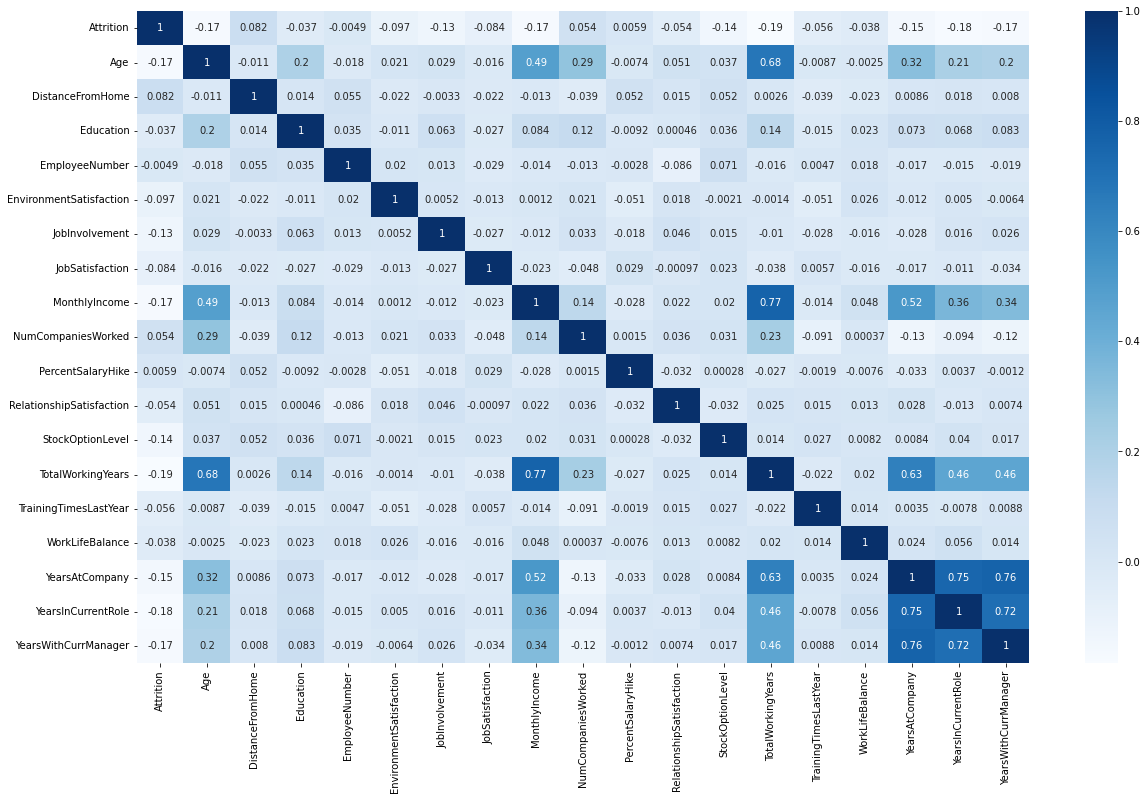

In [497]:
# data 원본 조회
plt.figure(figsize=(20, 12))
sns.heatmap(data.loc[:, 'Attrition':'YearsWithCurrManager'].corr(), annot=True, cmap='Blues')
plt.show()

In [498]:
x.drop(['Department', 'EducationField', 'EmployeeNumber', 'JobRole', 'NumCompaniesWorked', 'TrainingTimesLastYear'], axis=1, inplace=True)
x.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,33,Travel_Rarely,7.0,3,3,Male,3,3,Married,11691,No,11,4,0,14,4,13,9,7
1,35,Travel_Frequently,18.0,2,3,Male,3,4,Single,9362,No,11,3,0,10,3,2,2,2
2,42,Travel_Rarely,6.0,3,3,Male,3,1,Married,13348,No,13,2,1,18,4,13,7,7
3,46,Travel_Rarely,2.0,3,3,Female,3,1,Married,17048,No,23,1,0,28,3,26,15,9
4,39,Travel_Frequently,NaN,3,3,Male,3,4,Divorced,4127,No,18,4,1,7,3,2,1,2


- Department, EducationField, EmployeeNumber, JobRole, TrainingTimesLastYear는 target과 큰 연관성이 없다고 생각되어 제외
- NumCompaniesWorked는 근무 연수와 관련된 다른 feature들과 중복되는 부분이 있다고 생각되어 제외
- TrainingTimesLastYear 또한 교육훈련 횟수가 이직 여부를 판단하는데 큰 비율을 차지하지 않을 것이라고 생각되어 제외

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [499]:
x.isna().sum()

Age                          0
BusinessTravel               0
DistanceFromHome            54
Education                    0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

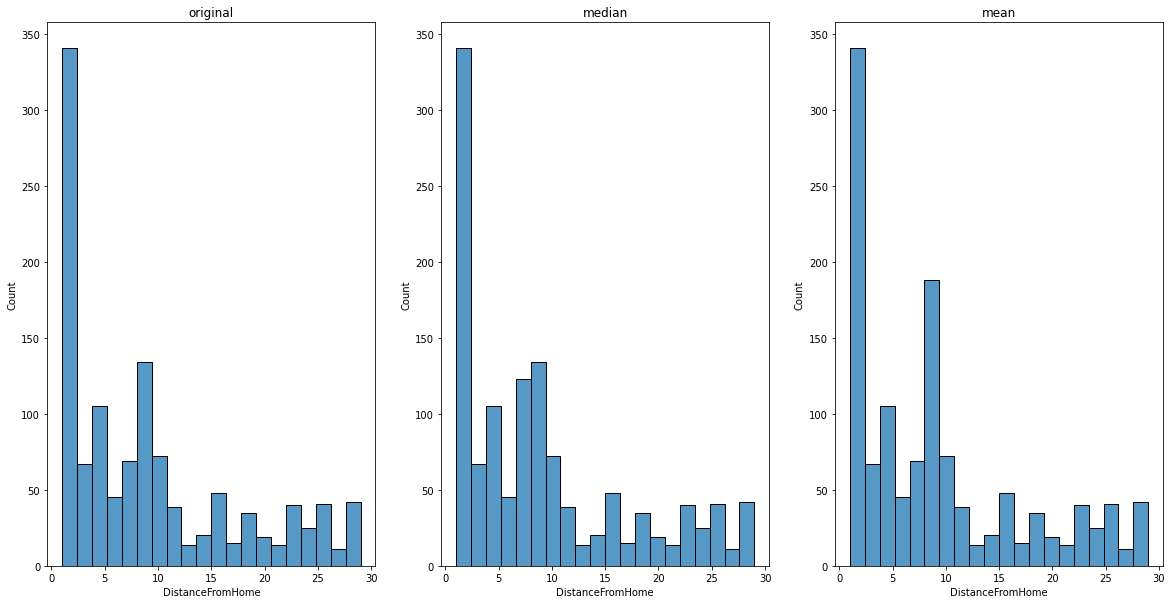

In [500]:
plt.figure(figsize=(20, 10))

plt.subplot(1,3,1)
sns.histplot(x['DistanceFromHome'].fillna(x['DistanceFromHome']), bins=20)
plt.title('original')

plt.subplot(1,3,2)
sns.histplot(x['DistanceFromHome'].fillna(x['DistanceFromHome'].median()), bins=20)
plt.title('median')

plt.subplot(1,3,3)
sns.histplot(x['DistanceFromHome'].fillna(x['DistanceFromHome'].mean()), bins=20)
plt.title('mean')

plt.show()

In [501]:
x['DistanceFromHome'] = x['DistanceFromHome'].fillna(x['DistanceFromHome'].median())

In [502]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1250 non-null   int64  
 1   BusinessTravel            1250 non-null   object 
 2   DistanceFromHome          1250 non-null   float64
 3   Education                 1250 non-null   int64  
 4   EnvironmentSatisfaction   1250 non-null   int64  
 5   Gender                    1250 non-null   object 
 6   JobInvolvement            1250 non-null   int64  
 7   JobSatisfaction           1250 non-null   int64  
 8   MaritalStatus             1250 non-null   object 
 9   MonthlyIncome             1250 non-null   int64  
 10  OverTime                  1250 non-null   object 
 11  PercentSalaryHike         1250 non-null   int64  
 12  RelationshipSatisfaction  1250 non-null   int64  
 13  StockOptionLevel          1250 non-null   int64  
 14  TotalWor

- 중앙값, 평균으로 nan을 대체했을 경우를 가정했고 원본 상태의 분포를 가장 잘 유지하고 있는 중앙값을 최종적으로 선정

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [503]:
x['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [504]:
x['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

- Gender와 OverTime의 경우 0과 1로만 가변수화를 진행하면 되기 때문에 직접 데이터를 변경해주고 나머지는 get_dummies로 변경

In [505]:
x['Gender'] = x['Gender'].map({'Male': 1, 'Female': 0})

In [506]:
x['OverTime'] = np.where(x['OverTime']=='Yes', 1, 0)

In [507]:
x = pd.get_dummies(x, drop_first=True)

In [508]:
x.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,...,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single
0,33,7.0,3,3,1,3,3,11691,0,11,...,0,14,4,13,9,7,0,1,1,0
1,35,18.0,2,3,1,3,4,9362,0,11,...,0,10,3,2,2,2,1,0,0,1
2,42,6.0,3,3,1,3,1,13348,0,13,...,1,18,4,13,7,7,0,1,1,0
3,46,2.0,3,3,0,3,1,17048,0,23,...,0,28,3,26,15,9,0,1,1,0
4,39,7.0,3,3,1,3,4,4127,0,18,...,1,7,3,2,1,2,1,0,0,0


### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수에 대해서 주석으로 설명하시오.

### 2.5 데이터 분할

* test 200건(test_size = 200), random_state = 2022
* val 200건(test_size = 200), random_state = 2022
* train 나머지.

In [509]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1250 non-null   int64  
 1   DistanceFromHome                  1250 non-null   float64
 2   Education                         1250 non-null   int64  
 3   EnvironmentSatisfaction           1250 non-null   int64  
 4   Gender                            1250 non-null   int64  
 5   JobInvolvement                    1250 non-null   int64  
 6   JobSatisfaction                   1250 non-null   int64  
 7   MonthlyIncome                     1250 non-null   int64  
 8   OverTime                          1250 non-null   int64  
 9   PercentSalaryHike                 1250 non-null   int64  
 10  RelationshipSatisfaction          1250 non-null   int64  
 11  StockOptionLevel                  1250 non-null   int64  
 12  TotalW

In [510]:
x.shape, y.shape

((1250, 21), (1250,))

In [511]:
from sklearn.model_selection import train_test_split
x_origin, x_test, y_origin, y_test = train_test_split(x, y, test_size=200, random_state=2022)

In [512]:
x_train, x_val, y_train, y_val = train_test_split(x_origin, y_origin, test_size=200, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [513]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [514]:
x_trainsc = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_valsc = pd.DataFrame(scaler.fit_transform(x_val), columns=x_train.columns)

In [515]:
x_trainsc.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,...,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,...,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.450728,0.288109,0.477647,0.585490,0.612941,0.573333,0.575686,0.284923,0.284706,0.298319,...,0.267843,0.284765,0.587843,0.177235,0.238758,0.241315,0.194118,0.695294,0.436471,0.327059
std,0.217665,0.284896,0.254986,0.366542,0.487364,0.239246,0.374679,0.243468,0.451540,0.258663,...,0.284437,0.196967,0.239822,0.154714,0.204873,0.209453,0.395753,0.460554,0.496240,0.469415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.250000,0.333333,0.000000,0.333333,0.333333,0.098058,0.000000,0.071429,...,0.000000,0.150000,0.333333,0.075000,0.111111,0.117647,0.000000,0.000000,0.000000,0.000000
50%,0.404762,0.214286,0.500000,0.666667,1.000000,0.666667,0.666667,0.204877,0.000000,0.214286,...,0.333333,0.250000,0.666667,0.125000,0.166667,0.176471,0.000000,1.000000,0.000000,0.000000
75%,0.595238,0.455357,0.750000,1.000000,1.000000,0.666667,1.000000,0.384671,1.000000,0.500000,...,0.333333,0.400000,0.666667,0.250000,0.388889,0.411765,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [516]:
x_valsc.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,...,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,0.449643,0.276964,0.486250,0.581667,0.585000,0.598333,0.570000,0.314631,0.270000,0.301429,...,0.258333,0.308514,0.601667,0.207917,0.246111,0.282500,0.140000,0.805000,0.510000,0.32500
std,0.223445,0.276282,0.271324,0.361456,0.493958,0.222411,0.365439,0.265122,0.445074,0.268330,...,0.278461,0.202384,0.220900,0.184109,0.202772,0.241287,0.347858,0.397195,0.501154,0.46955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.285714,0.062500,0.250000,0.333333,0.000000,0.333333,0.333333,0.114862,0.000000,0.071429,...,0.000000,0.162162,0.333333,0.083333,0.111111,0.125000,0.000000,1.000000,0.000000,0.00000
50%,0.416667,0.214286,0.500000,0.666667,1.000000,0.666667,0.666667,0.214792,0.000000,0.214286,...,0.333333,0.256757,0.666667,0.166667,0.222222,0.187500,0.000000,1.000000,1.000000,0.00000
75%,0.619048,0.357143,0.750000,1.000000,1.000000,0.666667,1.000000,0.465652,1.000000,0.500000,...,0.333333,0.405405,0.666667,0.277778,0.388889,0.437500,0.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [517]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression 모델링

In [518]:
model1 = LogisticRegression(solver='liblinear')
model1.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [519]:
val_pred1 = model1.predict(x_val)

In [520]:
print(confusion_matrix(y_val, val_pred1))
print(classification_report(y_val, val_pred1))

[[173   3]
 [ 17   7]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       176
           1       0.70      0.29      0.41        24

    accuracy                           0.90       200
   macro avg       0.81      0.64      0.68       200
weighted avg       0.89      0.90      0.88       200



#### (2) Decision Tree 모델링

In [521]:
# model2 = DecisionTreeClassifier(max_depth=5)
# model2.fit(x_train, y_train)

In [522]:
model_dt = DecisionTreeClassifier(random_state=2022)

param = {'max_depth': range(3, 25)}

model2 = GridSearchCV(model_dt, param, cv=5, scoring='accuracy', verbose=1)

In [523]:
model2.fit(x_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(3, 25)}, scoring='accuracy',
             verbose=1)

In [524]:
print('최적 파라미터값: ', model2.best_params_)
print('성능: ', model2.best_score_)

최적 파라미터값:  {'max_depth': 4}
성능:  0.8341176470588234


In [525]:
# from sklearn.tree import export_graphviz

# export_graphviz(model2, out_file='tree.dot', feature_names=x_train.columns, rounded=True, precision=4, filled=True)
# !dot -Tpng tree.dot -o dtree.png -Gdpi=100
# from IPython.display import Image
# Image(filename='dtree.png', width=1000)

In [526]:
val_pred2 = model2.predict(x_val)

In [527]:
print(confusion_matrix(y_val, val_pred2))
print(classification_report(y_val, val_pred2))

[[167   9]
 [ 20   4]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       176
           1       0.31      0.17      0.22        24

    accuracy                           0.85       200
   macro avg       0.60      0.56      0.57       200
weighted avg       0.82      0.85      0.84       200



#### (3) KNN 모델링

In [528]:
model_knn = KNeighborsClassifier()

param = {'n_neighbors': range(3, 30)}

model3 = GridSearchCV(model_knn, param, cv=10, scoring='accuracy')

In [529]:
model3.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 30)}, scoring='accuracy')

In [530]:
print('최적 파라미터값: ', model3.best_params_)
print('성능: ', model3.best_score_)

최적 파라미터값:  {'n_neighbors': 26}
성능:  0.8294117647058823


In [531]:
val_pred3 = model3.predict(x_val)

In [532]:
print(confusion_matrix(y_val, val_pred3))
print(classification_report(y_val, val_pred3))

[[176   0]
 [ 24   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00        24

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### (4) SVM 모델링

#### (5) Random Forest 모델링

#### (6) XGB 모델링

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [533]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [534]:
x_trainsc.shape, y_train.shape

((850, 21), (850,))

* 모델1 

In [535]:
keras.backend.clear_session()

model4 = keras.models.Sequential()
model4.add(keras.layers.Input(shape=(21,)))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


* 모델2

In [536]:
keras.backend.clear_session()

model5 = keras.models.Sequential()
model5.add(keras.layers.Dense(32, input_shape=(21,), activation='swish'))
model5.add(keras.layers.Dense(16, activation='swish'))
model5.add(keras.layers.Dense(8, activation='swish'))
model5.add(keras.layers.Dense(1, activation='sigmoid'))

model5.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


* 모델3

In [537]:
keras.backend.clear_session()

model6 = keras.models.Sequential()
model6.add(keras.layers.Dense(128, input_shape=(21,), activation='swish'))
model6.add(keras.layers.Dense(64, activation='swish'))
model6.add(keras.layers.Dense(32, activation='swish'))
model6.add(keras.layers.Dense(16, activation='swish'))
model6.add(keras.layers.Dense(1, activation='sigmoid'))

model6.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [538]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [539]:
hist1 = model4.fit(x_trainsc, y_train, epochs=300, validation_split=0.2, callbacks=[es])
val_pred4 = model4.predict(x_valsc)

Epoch 1/300
22/22 [==============================] - 1s 10ms/step - loss: 0.7322 - accuracy: 0.4353 - val_loss: 0.7096 - val_accuracy: 0.4471
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5765 - val_loss: 0.6540 - val_accuracy: 0.6412
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6971 - val_loss: 0.6090 - val_accuracy: 0.7353
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.7765 - val_loss: 0.5727 - val_accuracy: 0.7588
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.8162 - val_loss: 0.5448 - val_accuracy: 0.8059
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8309 - val_loss: 0.5229 - val_accuracy: 0.8176
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.8324 - val_loss: 0.5058 - val_accuracy: 0.8235
Epoch 8/300


In [540]:
hist2 = model5.fit(x_trainsc, y_train, epochs=300, validation_split=0.2, callbacks=[es])
val_pred5 = model5.predict(x_valsc)

Epoch 1/300
22/22 [==============================] - 1s 11ms/step - loss: 0.6266 - accuracy: 0.7574 - val_loss: 0.5521 - val_accuracy: 0.8235
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.8309 - val_loss: 0.4556 - val_accuracy: 0.8235
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.8309 - val_loss: 0.4304 - val_accuracy: 0.8235
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4344 - accuracy: 0.8309 - val_loss: 0.4116 - val_accuracy: 0.8235
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8309 - val_loss: 0.3972 - val_accuracy: 0.8294
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8324 - val_loss: 0.3730 - val_accuracy: 0.8294
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8382 - val_loss: 0.3574 - val_accuracy: 0.8529
Epoch 8/300


In [541]:
hist3 = model6.fit(x_trainsc, y_train, epochs=300, validation_split=0.2, callbacks=[es])
val_pred6 = model6.predict(x_valsc)

Epoch 1/300
22/22 [==============================] - 2s 12ms/step - loss: 0.5581 - accuracy: 0.7985 - val_loss: 0.4322 - val_accuracy: 0.8235
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8309 - val_loss: 0.4125 - val_accuracy: 0.8235
Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.8309 - val_loss: 0.3748 - val_accuracy: 0.8235
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8368 - val_loss: 0.3515 - val_accuracy: 0.8471
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8382 - val_loss: 0.3392 - val_accuracy: 0.8588
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8485 - val_loss: 0.3658 - val_accuracy: 0.8529
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8500 - val_loss: 0.3446 - val_accuracy: 0.8529
Epoch 8/300


## 5.성능 비교
* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * 평가지표 선정 이유도 주석으로 기술하시오.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

- 직원 이직률을 예측하는데 있어 전체 샘플 중 정답을 예측한 가장 기본적인 요소인 정확도를 평가지표로 결정

### 5.2 성능 비교

In [543]:
# 전체 모델 accuracy 비교
print(accuracy_score(y_test, val_pred1))
print(accuracy_score(y_test, val_pred2))
print(accuracy_score(y_test, val_pred3))
print(hist1.history['accuracy'][263])
print(hist2.history['accuracy'][35])
print(hist3.history['accuracy'][30])

0.825
0.82
0.845
0.8500000238418579
0.8676470518112183
0.8705882430076599


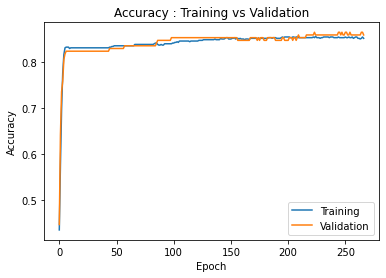

In [544]:
# 딥러닝 모델별 accuracy 비교

if not isinstance(hist1, dict):
    history = hist1.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

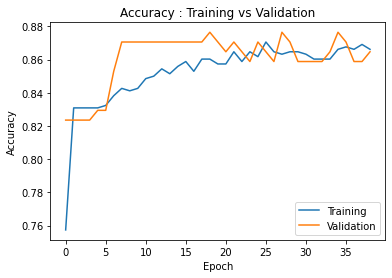

In [545]:
if not isinstance(hist2, dict):
    history = hist2.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

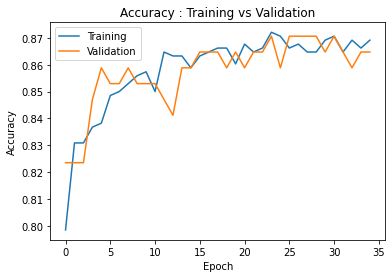

In [546]:
if not isinstance(hist3, dict):
    history = hist3.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()